## Sanyukta Chapagain
## MACHINE LEARNING BIOINFORMATICS HOMEWORK 2
PROGRAMMING 1

##### We began by downloading the single-cell ATAC-seq data from the GEO dataset GSE126074, which includes three main files:

counts.mtx.gz – sparse matrix of peak accessibility
barcodes.tsv.gz – unique cell barcodes
peaks.tsv.gz – genomic peak regions

###### These .gz files were uncompressed using Python’s gzip and shutil libraries and stored locally for further processing

In [2]:
import gzip

In [3]:
import shutil

In [4]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [5]:
dataFolder = r"C:\Users\sanyu\OneDrive\Desktop\MLBHW2"

In [6]:
# Files to unzip
filesToUnzip = [
    "barcodes.tsv.gz",
    "counts.mtx.gz",
    "peaks.tsv.gz"
]

for fileName in filesToUnzip:
    gzPath = os.path.join(dataFolder, fileName)
    outPath = gzPath.replace(".gz", "")
    with gzip.open(gzPath, 'rb') as f_in:
        with open(outPath, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
    print(f"Unzipped: {fileName} → {os.path.basename(outPath)}")

Unzipped: barcodes.tsv.gz → barcodes.tsv
Unzipped: counts.mtx.gz → counts.mtx
Unzipped: peaks.tsv.gz → peaks.tsv


#### Loading Libraries


In [7]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import episcanpy.api as epi

In [8]:
# Set figure style (optional but recommended)
sc.settings.set_figure_params(dpi=100, color_map='viridis')

# File to save results (you can change the name or location later)
results_file = 'buenrostro_pbmc_results.h5ad'

#### Loading our matrix file 


In [9]:
import episcanpy.api as epi

adata = epi.pp.read_ATAC_10x(
    "C:/Users/sanyu/OneDrive/Desktop/MLBHW2/counts.mtx",
    "C:/Users/sanyu/OneDrive/Desktop/MLBHW2/barcodes.tsv",
    "C:/Users/sanyu/OneDrive/Desktop/MLBHW2/peaks.tsv"
)

print(adata)



AnnData object with n_obs × n_vars = 10309 × 244544
    uns: 'omic'


### We started with an AnnData object of shape 10,309 cells × 244,544 peaks, representing scATAC-seq chromatin accessibility data from PBMCs (GSE126074).

In [10]:
# Anndata object as a whole
adata

AnnData object with n_obs × n_vars = 10309 × 244544
    uns: 'omic'

In [11]:
#Barcode file
adata.obs

Empty DataFrame
Columns: []
Index: [09A_GATGCGCGGCTA, 09A_GCCATGACCCCA, 09F_TGGACGATTTGT, 09K_GTCTGCCATTAC, 09F_GGATGAAGAGGG, 09C_AGCCCGCCATGG, 09A_GCCTTCTTCCGT, 09F_GTAAAGCCAACA, 09D_TCCAGGCACGGA, 09A_GTAGGAAGCCAC, 09F_TACAAGTTCCCT, 09G_AGCGGTCGGAGC, 09I_ATAGACAGTACA, 09A_TATGTTTACCAC, 09B_CGCTGACCATTG, 09I_AAGTTGAGTGCG, 09E_GTAGAACGTCTT, 09L_GCTCCCATGCGT, 09E_GACAGTTAAGAG, 09J_GCGTTCGGCTAC, 09K_TCCGCGAGGCCC, 09K_CGTACCAAATCG, 09D_CAGAAACTCAAA, 09B_ATTGGGTTTGCC, 09H_AGGTTGCCAAGC, 09I_CTGTACGGTCCG, 09K_TGCACCTTCGGC, 09L_CAGCAGGTAAGT, 09A_CGTCGAGAGGGC, 09K_AACGGAGATGGG, 09D_TATCCGAAGCCC, 09F_CGCGGTTAGTTG, 09F_CGCTAATGCCCA, 09A_ACTGCATTGCAG, 09J_AATGGACTACTT, 09C_GTGCTCAGAGGC, 09J_CGCTTATCCCCC, 09J_GCTAGGCTTAGA, 09A_GGGCTAATCAGA, 09B_ACCAGGGCGCGA, 09F_ATCAGCGCCACG, 09I_TTTCCAATGCAG, 09K_GGTCCACGGACT, 09C_CCGAGGCTACCC, 09H_GTAAGTGGTAGA, 09A_GGGTCTGTAGCC, 09L_GGCTCAAACCGC, 09K_CACATCGTTCAT, 09J_GAACATGTCAAA, 09I_AGACCGCGAACA, 09K_GTACTTGCGCTG, 09A_AAGATTTCACCG, 09H_CTGTTTTGCAAC, 09F_TGCACGGGATTC, 09G_ACGAATGCTAGT, 09J_TTCATATCCGCC, 09B_GCAGAATCCAAT, 09F_AGCCTGCATCGT, 09B_GGCGCCGGGAGC, 09L_CTTATTGGCTAT, 09D_CGCGAGGCCGCG, 09K_CACGAGGCAAAA, 09E_ATCAGTCGATAC, 09K_ACCCTCCGAAGC, 09F_AACCGGAGGTAC, 09A_GCTATCGCTAGC, 09L_ATCGATCTTCGC, 09A_ACTACATTCCCC, 09F_TGTCGCATGAAC, 09H_CTAGTGCCCCTT, 09A_AGGCAATAAGTG, 09J_ATCGCAGAGCGC, 09E_ACCAATGGGTCG, 09F_CCAACGGATCCC, 09J_TCGAAAACCTCG, 09A_GTGAACACGAAG, 09A_GGAACGCCGGTA, 09K_GAGCGTCAGTAT, 09F_CAGAAGGTCTAC, 09H_CGACGTGCCTAA, 09J_CTACGACCTGTC, 09F_CCTACAGGAACG, 09B_TGTCGCAGCCAT, 09J_GGTGTTCAACAT, 09D_GCCTGCGGATGT, 09A_AGTCGCTACCAA, 09J_GACTAGACTCGC, 09C_CGCGGCCTATTC, 09I_GCTCAACGGTTC, 09B_AGAGTAAGAACC, 09D_GATCCACGCGTA, 09A_TAACACTCTCGG, 09J_AAACTGGGAGAC, 09J_GGTGTACTGGCG, 09I_GCGCGCCGAATG, 09A_TACAGATCAGCC, 09A_GAGAACGGCTGC, 09H_GTGACGCCATAA, 09L_GCGGTAATTAAA, 09J_GGTCGTCCAGCT, ...]

[10309 rows x 0 columns]

In [12]:
#pEAKS FILE
adata.var

Empty DataFrame
Columns: []
Index: [chr1:3005833-3005982, chr1:3094772-3095489, chr1:3119556-3120739, chr1:3121334-3121696, chr1:3134637-3135032, chr1:3164929-3165186, chr1:3167174-3167517, chr1:3181253-3181529, chr1:3204775-3205172, chr1:3210899-3211332, chr1:3216313-3216806, chr1:3217279-3217678, chr1:3228082-3228372, chr1:3265226-3265683, chr1:3285156-3285379, chr1:3292445-3293016, chr1:3297430-3297757, chr1:3299624-3299967, chr1:3309837-3310383, chr1:3322351-3323065, chr1:3325260-3325476, chr1:3327464-3327716, chr1:3330234-3330873, chr1:3333641-3333963, chr1:3360842-3361271, chr1:3366414-3366776, chr1:3369504-3369922, chr1:3371691-3371872, chr1:3372309-3372820, chr1:3377281-3377446, chr1:3381808-3382304, chr1:3388374-3388802, chr1:3391831-3392476, chr1:3399032-3399359, chr1:3399823-3400568, chr1:3405984-3406577, chr1:3407421-3407730, chr1:3410708-3411386, chr1:3418259-3418810, chr1:3433756-3434460, chr1:3444674-3444905, chr1:3455348-3455648, chr1:3457789-3458115, chr1:3466505-3466942, chr1:3507183-3507386, chr1:3514660-3514829, chr1:3514846-3515111, chr1:3533007-3533224, chr1:3551494-3551737, chr1:3552496-3552748, chr1:3576226-3576496, chr1:3587423-3587613, chr1:3588221-3588413, chr1:3596263-3596464, chr1:3611234-3611538, chr1:3632944-3633164, chr1:3652834-3653085, chr1:3659362-3659608, chr1:3662270-3662895, chr1:3663468-3663617, chr1:3670910-3672688, chr1:3710091-3710509, chr1:3712394-3712729, chr1:3742054-3742452, chr1:3853798-3854101, chr1:3892194-3892555, chr1:3900215-3900720, chr1:3903437-3903847, chr1:3909390-3909898, chr1:3932527-3932828, chr1:3990383-3990744, chr1:3994752-3995136, chr1:4069020-4069469, chr1:4089644-4090082, chr1:4138975-4139633, chr1:4146063-4146251, chr1:4175014-4175205, chr1:4186695-4186912, chr1:4255751-4255947, chr1:4273150-4273459, chr1:4332330-4332726, chr1:4362406-4362723, chr1:4392575-4392932, chr1:4414206-4415170, chr1:4527371-4527827, chr1:4571432-4572236, chr1:4611738-4612069, chr1:4703137-4703933, chr1:4722608-4722968, chr1:4748085-4748514, chr1:4752057-4752286, chr1:4766602-4767160, chr1:4785358-4786256, chr1:4807441-4808229, chr1:4813314-4813890, chr1:4818598-4818766, chr1:4829669-4829826, chr1:4833627-4833852, chr1:4841973-4842521, chr1:4857342-4858057, ...]

[244544 rows x 0 columns]

In [13]:
#Count.mtx file
adata.X

<Compressed Sparse Column sparse matrix of dtype 'int64'
	with 25461864 stored elements and shape (10309, 244544)>

## Preprocessing


##### Binarization :


In [14]:
print(np.max(adata.X))  # we check addata because it is no longer our raw matrx file but the bilogically interpeatable file w meaning


16


In [15]:
epi.pp.binarize(adata)

In [16]:
#Makinf it binarized
print(np.max(adata.X))

1


In [17]:
#Filterig empty deatures or barcodes
epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_features(adata, min_cells=1)


In [18]:
print(adata)

AnnData object with n_obs × n_vars = 10309 × 244538
    obs: 'nb_features'
    var: 'n_cells'
    uns: 'omic'


#### QC Visualization 

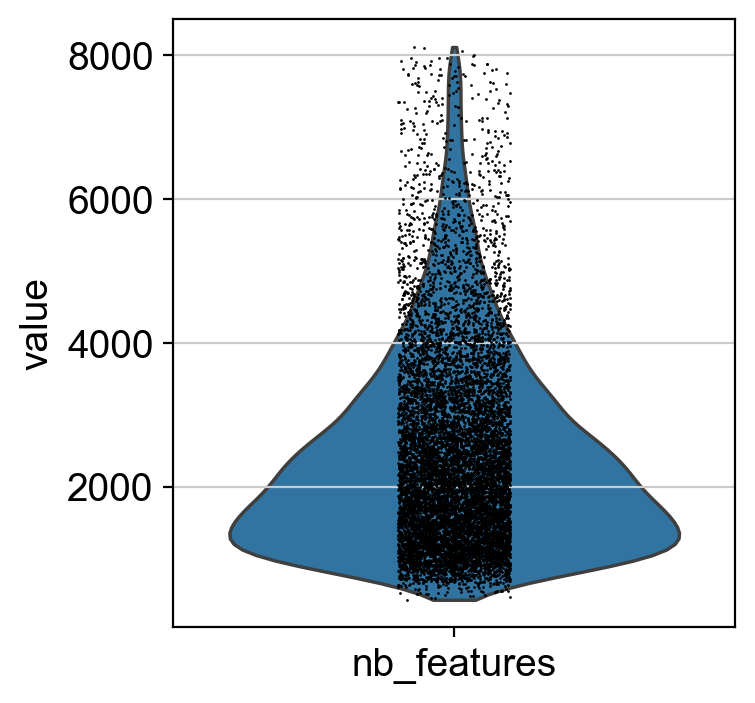

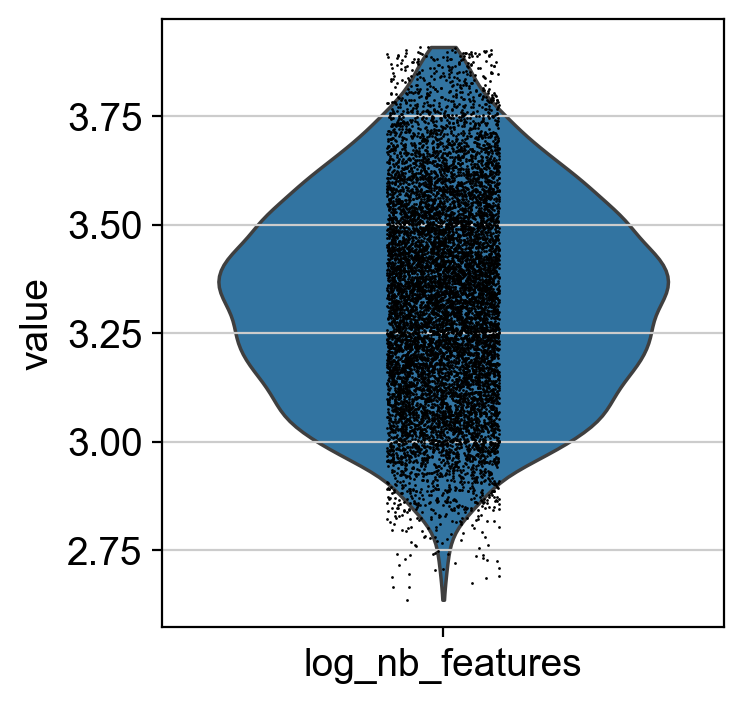

In [19]:
# For visualization only
adata.obs['log_nb_features'] = [np.log10(x) for x in adata.obs['nb_features']]
epi.pl.violin(adata, ['nb_features'])
epi.pl.violin(adata, ['log_nb_features'])


#### QC histogram 


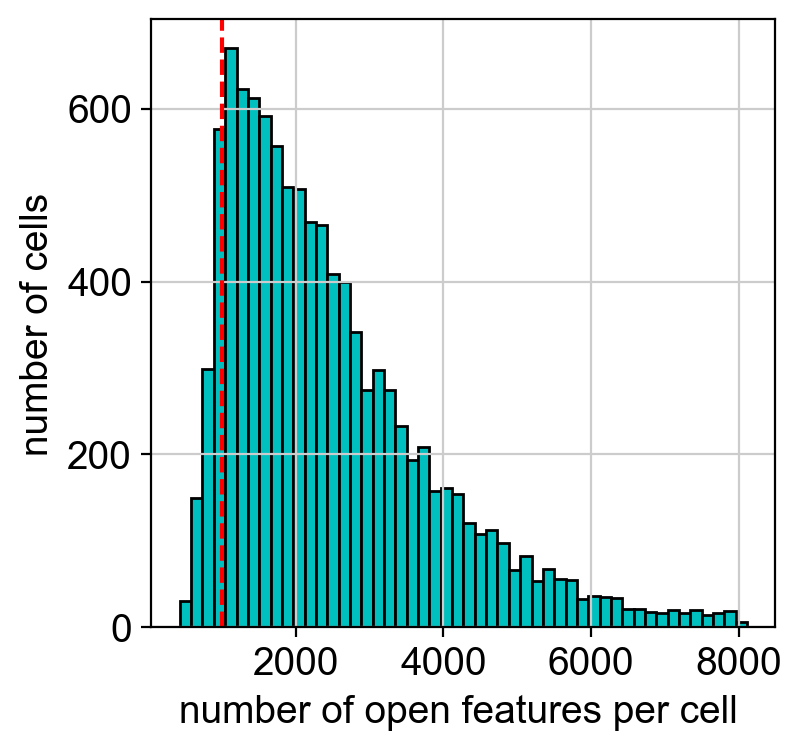

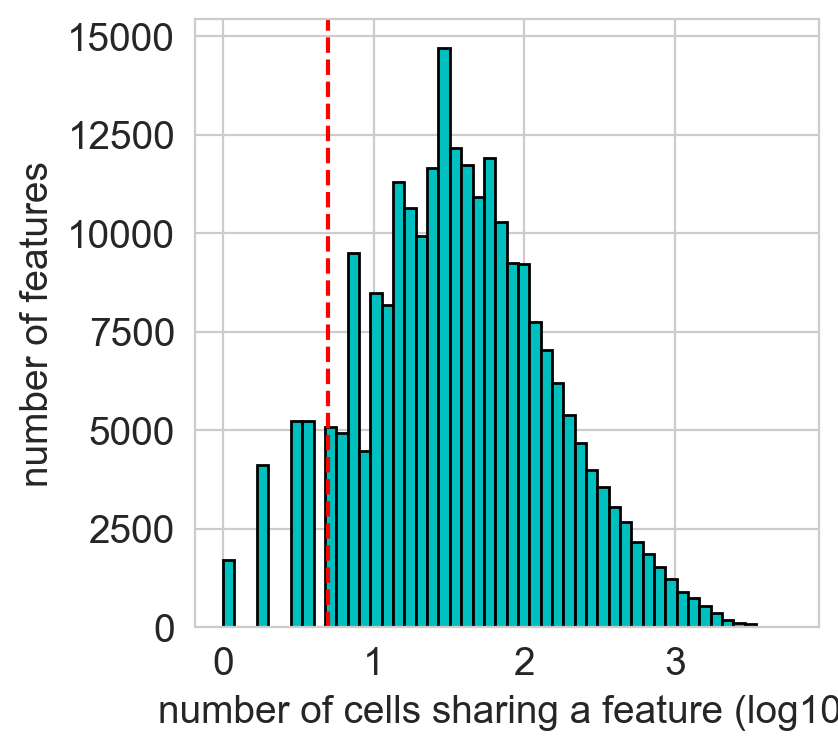

In [20]:
epi.pp.coverage_cells(adata, binary=True, log=False, bins=50, threshold=1000)
epi.pp.coverage_features(adata, binary=True, log=True, threshold=5)


### Filtering based on chsen threshold


In [21]:
# Actually filter the AnnData object
epi.pp.filter_cells(adata, min_features=1000)
epi.pp.filter_features(adata, min_cells=5)

# Confirm how much was filtered
print(adata)


AnnData object with n_obs × n_vars = 9431 × 227341
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness'
    uns: 'omic'


### Identify Variable features


`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



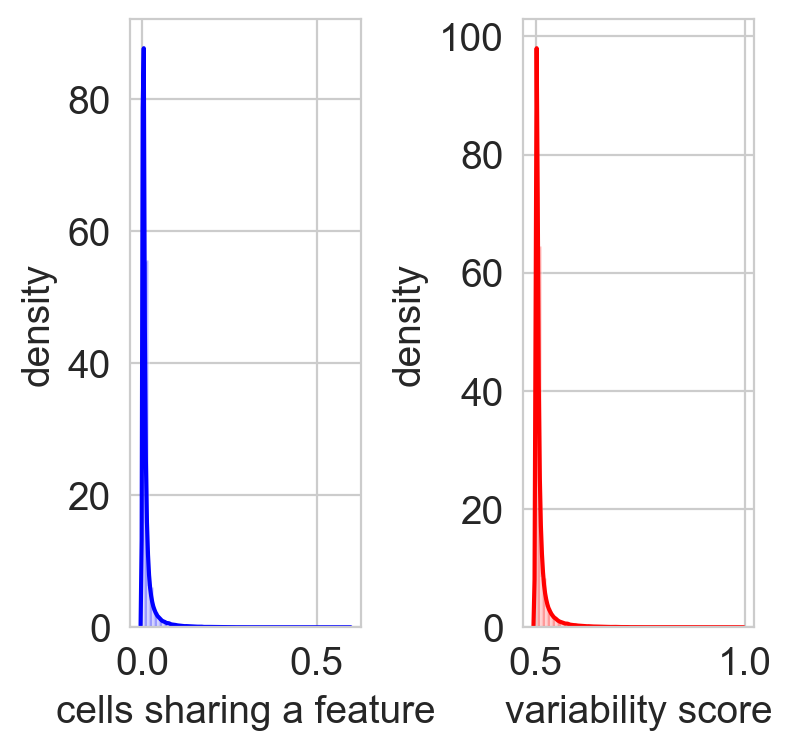

In [22]:
epi.pp.cal_var(adata)


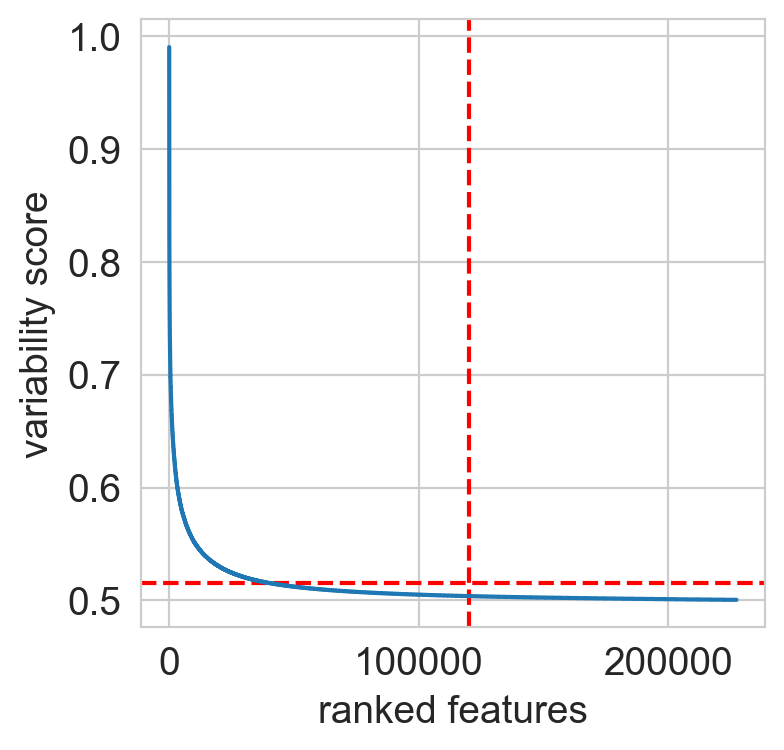

In [23]:
epi.pl.variability_features(adata, min_score=0.515, nb_features=120000)



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



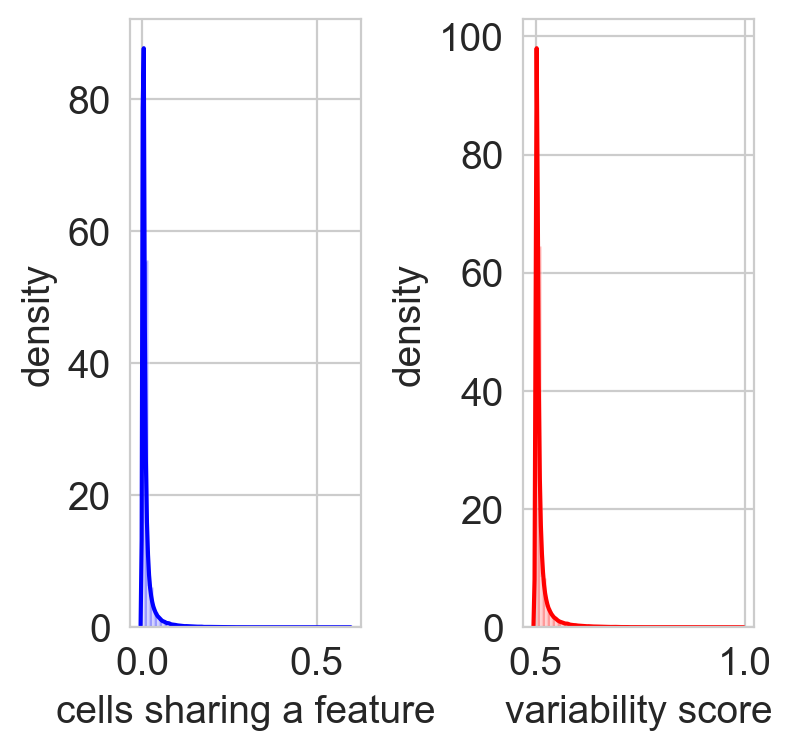

In [24]:
#Selecting the top Variable
adata.raw= adata
adata =epi.pp.select_var_feature(adata, nb_features=120000, copy=True)

In [25]:
print(adata)

View of AnnData object with n_obs × n_vars = 9431 × 120960
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'omic'


##### This AnnData object contains 9,431 high-quality cells (observations) and 120,960 selected variable peaks (features) after filtering and feature selection.

In [26]:
#Removing any leftover extreme cells
epi.pp.filter_cells(adata, min_features=2000)
epi.pp.filter_cells(adata, max_features=25000)



### Normalisation

In [27]:

epi.pp.tfidf(adata)


In [28]:
#PCA andcomputing neighbors and Umpa visualisation 
epi.pp.pca(adata, n_comps=50)
epi.pp.neighbors(adata, n_pcs=30, n_neighbors=15)
epi.tl.umap(adata)


In [29]:
print(adata.obsm.keys())

KeysView(AxisArrays with keys: X_pca, X_umap)


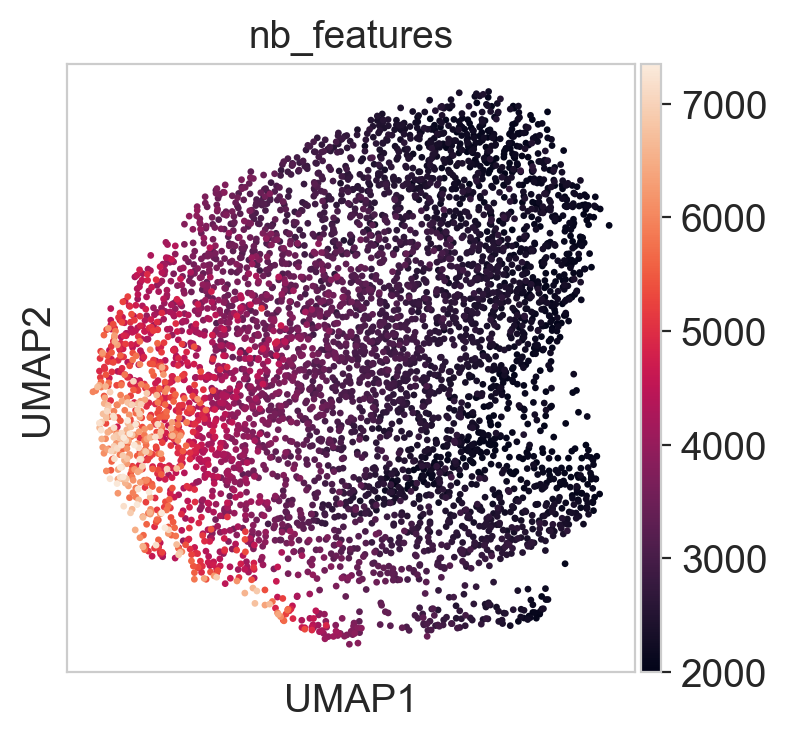

In [30]:
#plotting Umap
sc.pl.umap(adata, color=["nb_features"])

In [31]:
adata.obs.columns



Index(['nb_features', 'log_nb_features'], dtype='object')

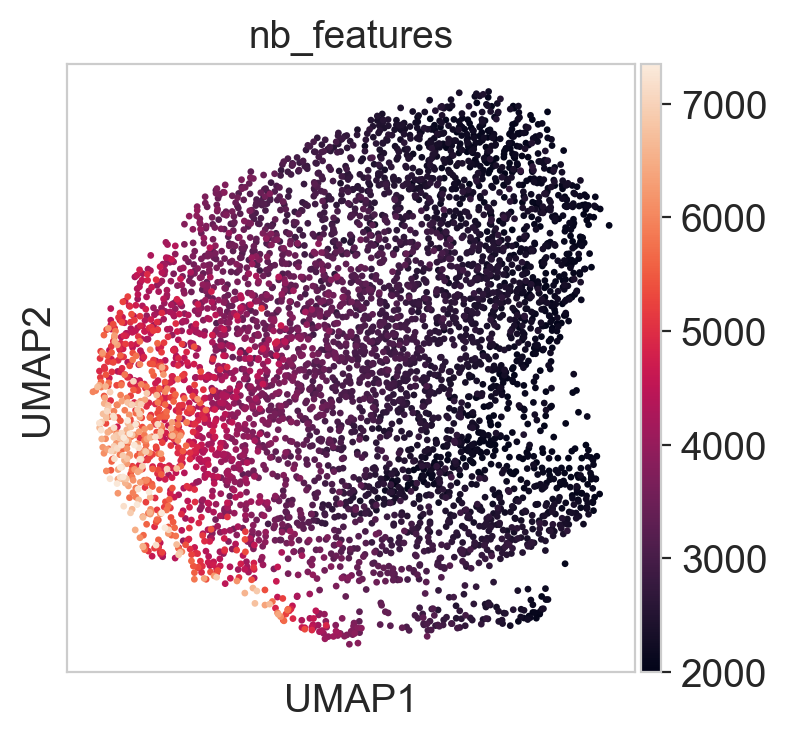

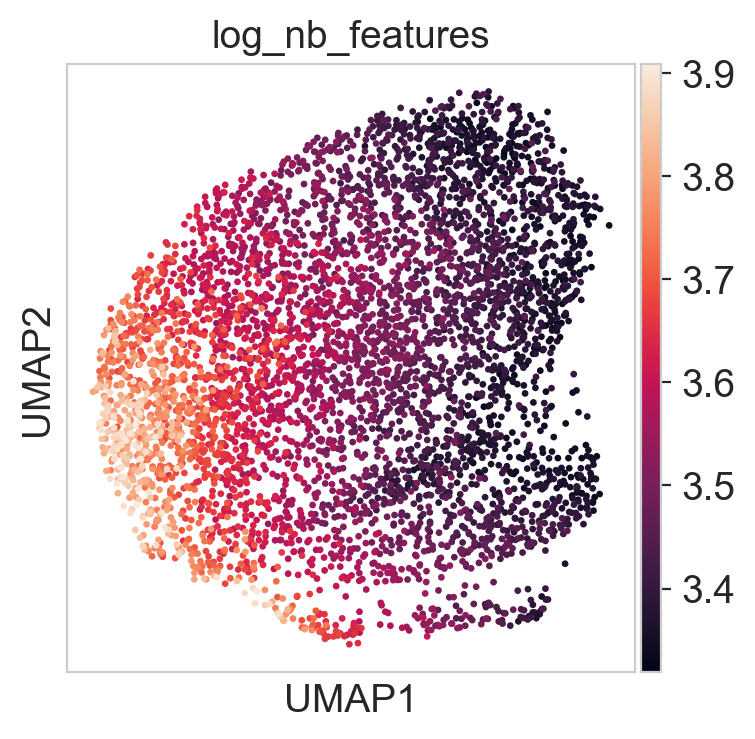

In [32]:
sc.pl.umap(adata, color=["nb_features"])
sc.pl.umap(adata, color=["log_nb_features"])


In [33]:
#Visualisation 
sc.settings.set_figure_params(dpi=80, color_map='gist_earth')

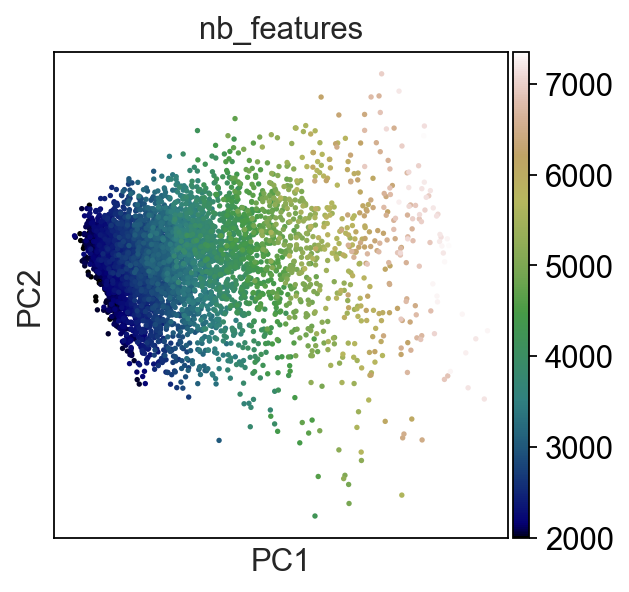

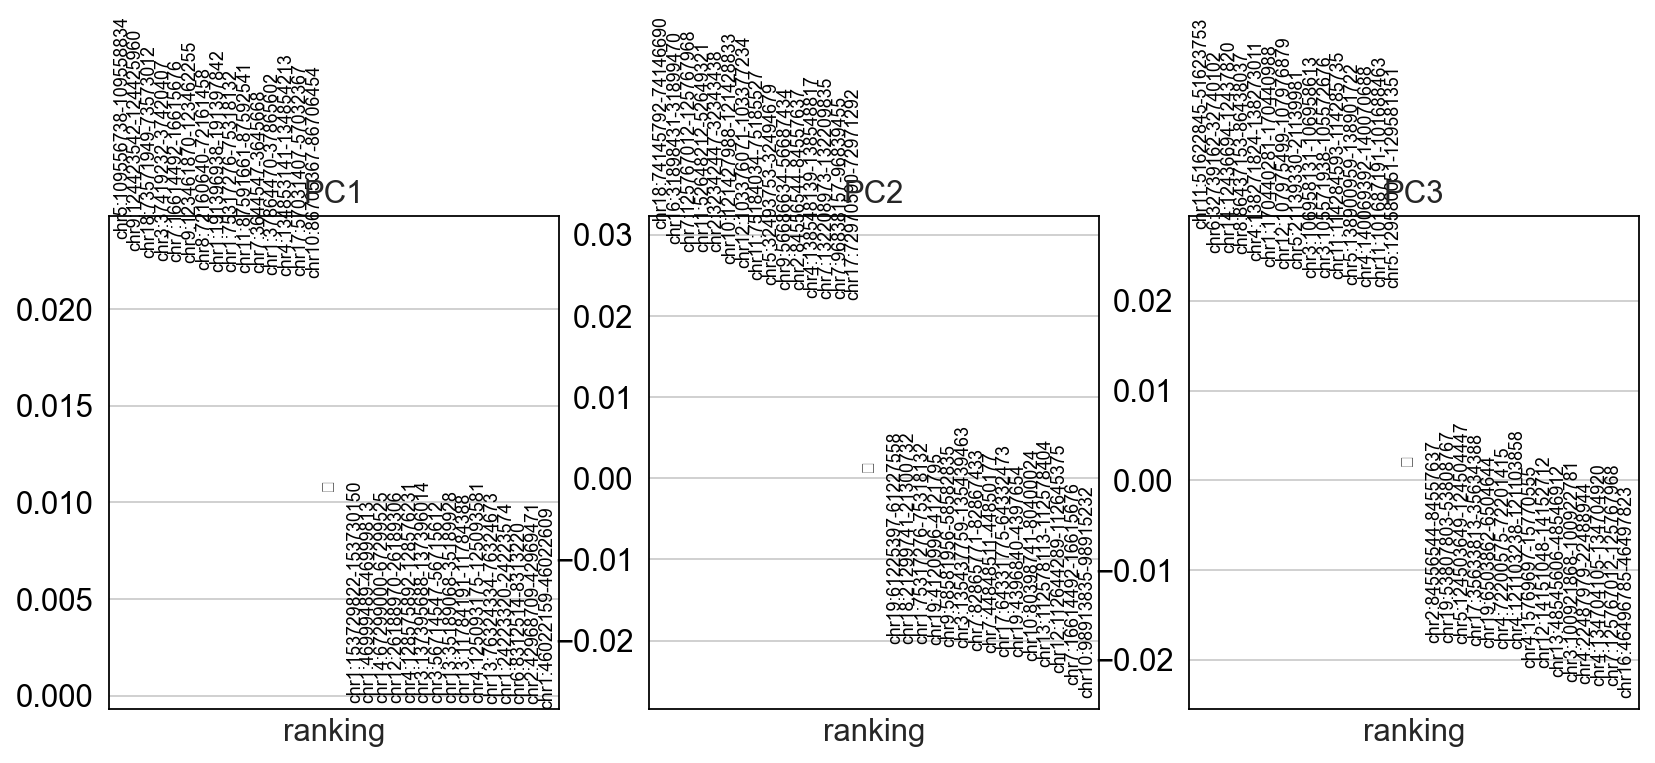

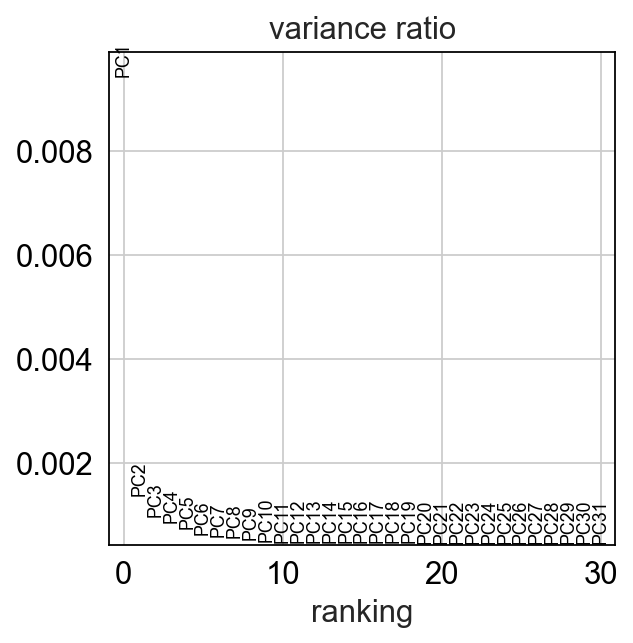

In [34]:
epi.pl.pca_overview(adata, color=["nb_features"])

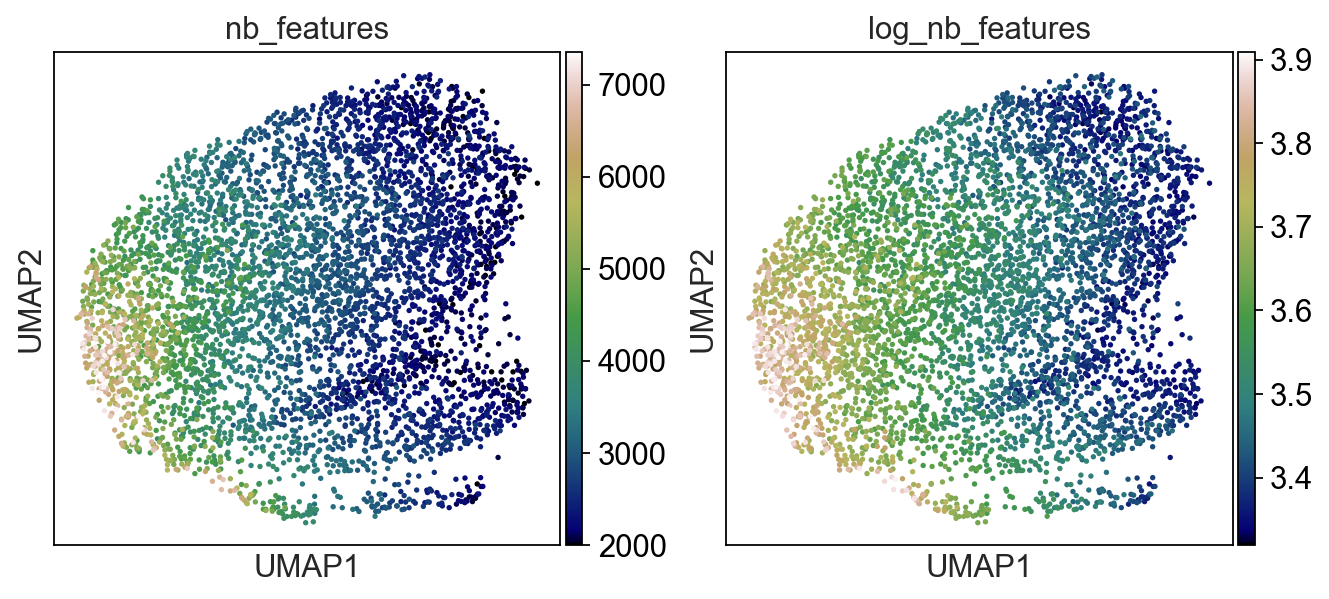

In [35]:
epi.pl.umap(adata, color=["nb_features", "log_nb_features"])

### Clustering 

In [36]:
#Clustering
adata

AnnData object with n_obs × n_vars = 5070 × 120960
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'omic', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'tf-idf'
    obsp: 'distances', 'connectivities'

In [37]:
pip install igraph

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install louvain


Note: you may need to restart the kernel to use updated packages.


## Louvain clustering

In [39]:
epi.tl.louvain(adata)

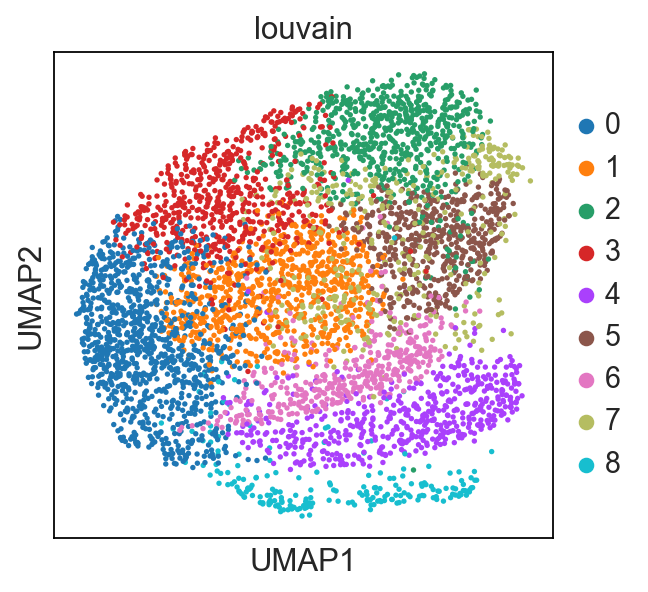

In [41]:
epi.pl.umap(adata, color=['louvain'], wspace= 0.4)

##### The UMAP plot shows the 2D embedding of 9,431 cells based on their chromatin accessibility profiles. Each dot represents a single cell, and colors indicate Louvain clusters, a community-detection method used to identify cell groups with similar accessibility patterns.

Here, 9 clusters (0 through 8) are shown, suggesting that the data naturally partitions into 9 distinct cell populations.

In [42]:
epi.tl.getNClusters(adata, n_cluster = 14)

step 0
got 15 at resolution 1.5
step 1
got 9 at resolution 0.75
step 2
got 12 at resolution 1.125
step 3
got 14 at resolution 1.3125


## Kmeans clustering

In [43]:
epi.tl.kmeans(adata, num_clusters=14)

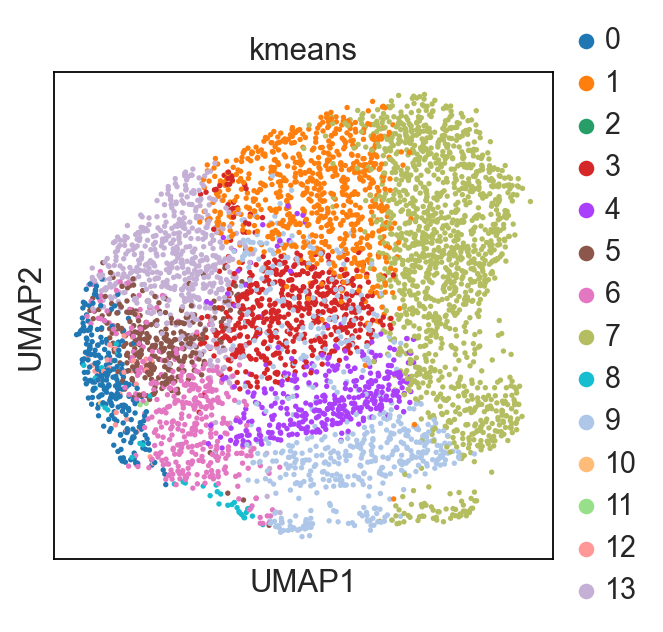

In [45]:
epi.pl.umap(adata, color=['kmeans'], wspace= 0.4)

##### This UMAP plot shows the result of applying KMeans clustering to the scATAC-seq data after dimensionality reduction. We specified 14 clusters (k = 14), and each dot again represents a single cell, colored by its assigned KMeans cluster. In this case, it provides more granular resolution, useful for identifying subpopulations or finer regulatory differences.

## Hierarchial clustering 

In [48]:
epi.tl.hc(adata, num_clusters=14)

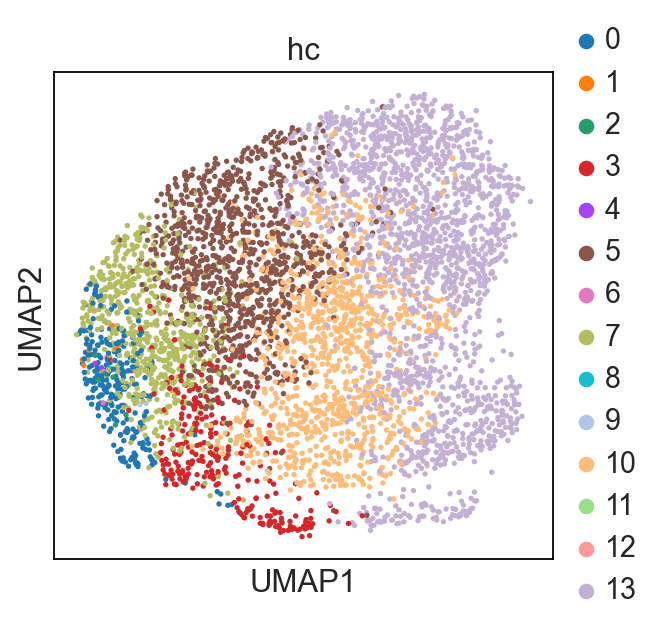

In [49]:
epi.pl.umap(adata, color = ['hc'], wspace=0.4)


#### This UMAP plot shows the distribution of cells colored by Hierarchical Clustering (HC) results with 14 clusters.

Some clusters (like cluster 5 and cluster 10) are broad and dominant, occupying large regions of the UMAP space. This suggests that HC grouped many similar cells together into a few large clusters.In this case, HC provides smoother transitions between clusters but may under-separate biologically distinct subpopulations that KMeans or Louvain captured.

## leiden clustering 



In [52]:
epi.tl.leiden(adata)

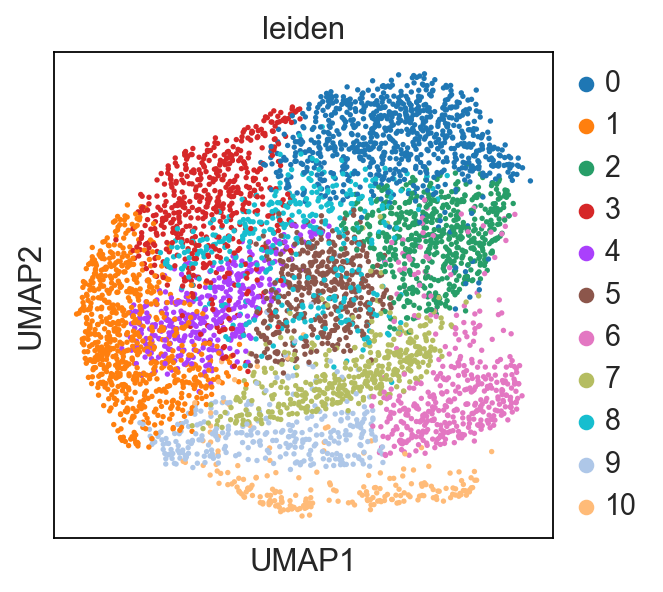

In [53]:
epi.pl.umap(adata, color =['leiden'], wspace=0.4)

#### This UMAP shows the result of Leiden clustering, a graph-based community detection method similar to Louvain but generally more robust and better at identifying well-separated groups.

11 clusters (0 to 10) were detected.

Clusters are well-separated and evenly distributed in the UMAP space, with minimal overlap.

In [54]:
epi.tl.getNClusters(adata, n_cluster=14, method='leiden')

step 0
got 15 at resolution 1.5
step 1
got 9 at resolution 0.75
step 2
got 12 at resolution 1.125
step 3
got 13 at resolution 1.3125
step 4
got 15 at resolution 1.40625
step 5
got 14 at resolution 1.359375


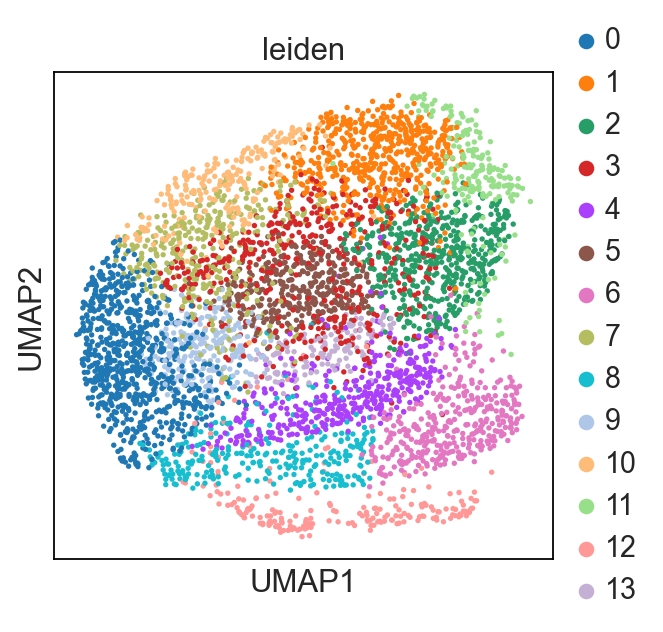

In [55]:
epi.pl.umap(adata, color=['leiden'], wspace=0.4)

#### This UMAP projection shows the chromatin accessibility landscape of cells after clustering using the Leiden algorithm, with 14 distinct clusters (0 to 13).

The clusters are well-separated and cover the UMAP space evenly, suggesting the Leiden algorithm captured meaningful structure in the data.

Clusters like 0, 1, 2, and 3 occupy distinct regions, while others like 5 and 9 are closer together, possibly reflecting transitional cell states or related subtypes.


### Comparsion of all Clustering methods
Louvain shows broad and well-separated clusters, making it suitable for identifying major cell types. However, it may miss finer subpopulations due to its lower resolution (9 clusters).

KMeans generates uniform-sized clusters, but visually appears to over-fragment the data, especially in areas where Louvain or Leiden showed a single cluster. This method does not consider graph connectivity, which can lead to biologically meaningless splits.

Hierarchical Clustering (HC) merges large swaths of cells into dominant clusters (e.g., cluster 13), indicating coarser groupings. While useful for discovering broader lineage relationships, HC seems to underperform in capturing local structure in this dataset.

Leiden achieves the best balance, producing well-separated and biologically interpretable clusters. With 11 or 14 clusters depending on resolution, it effectively captures both major populations and finer substructures that Louvain and HC missed, without the artificial fragmentation seen in KMeans.

** Conclusion


In [58]:
adata.write("PBMC_processed.h5ad")

In [59]:
#Differential chromain ana;ysis ranking

In [60]:
epi.tl.rank_features(adata, groupby='louvain', omic='ATAC')

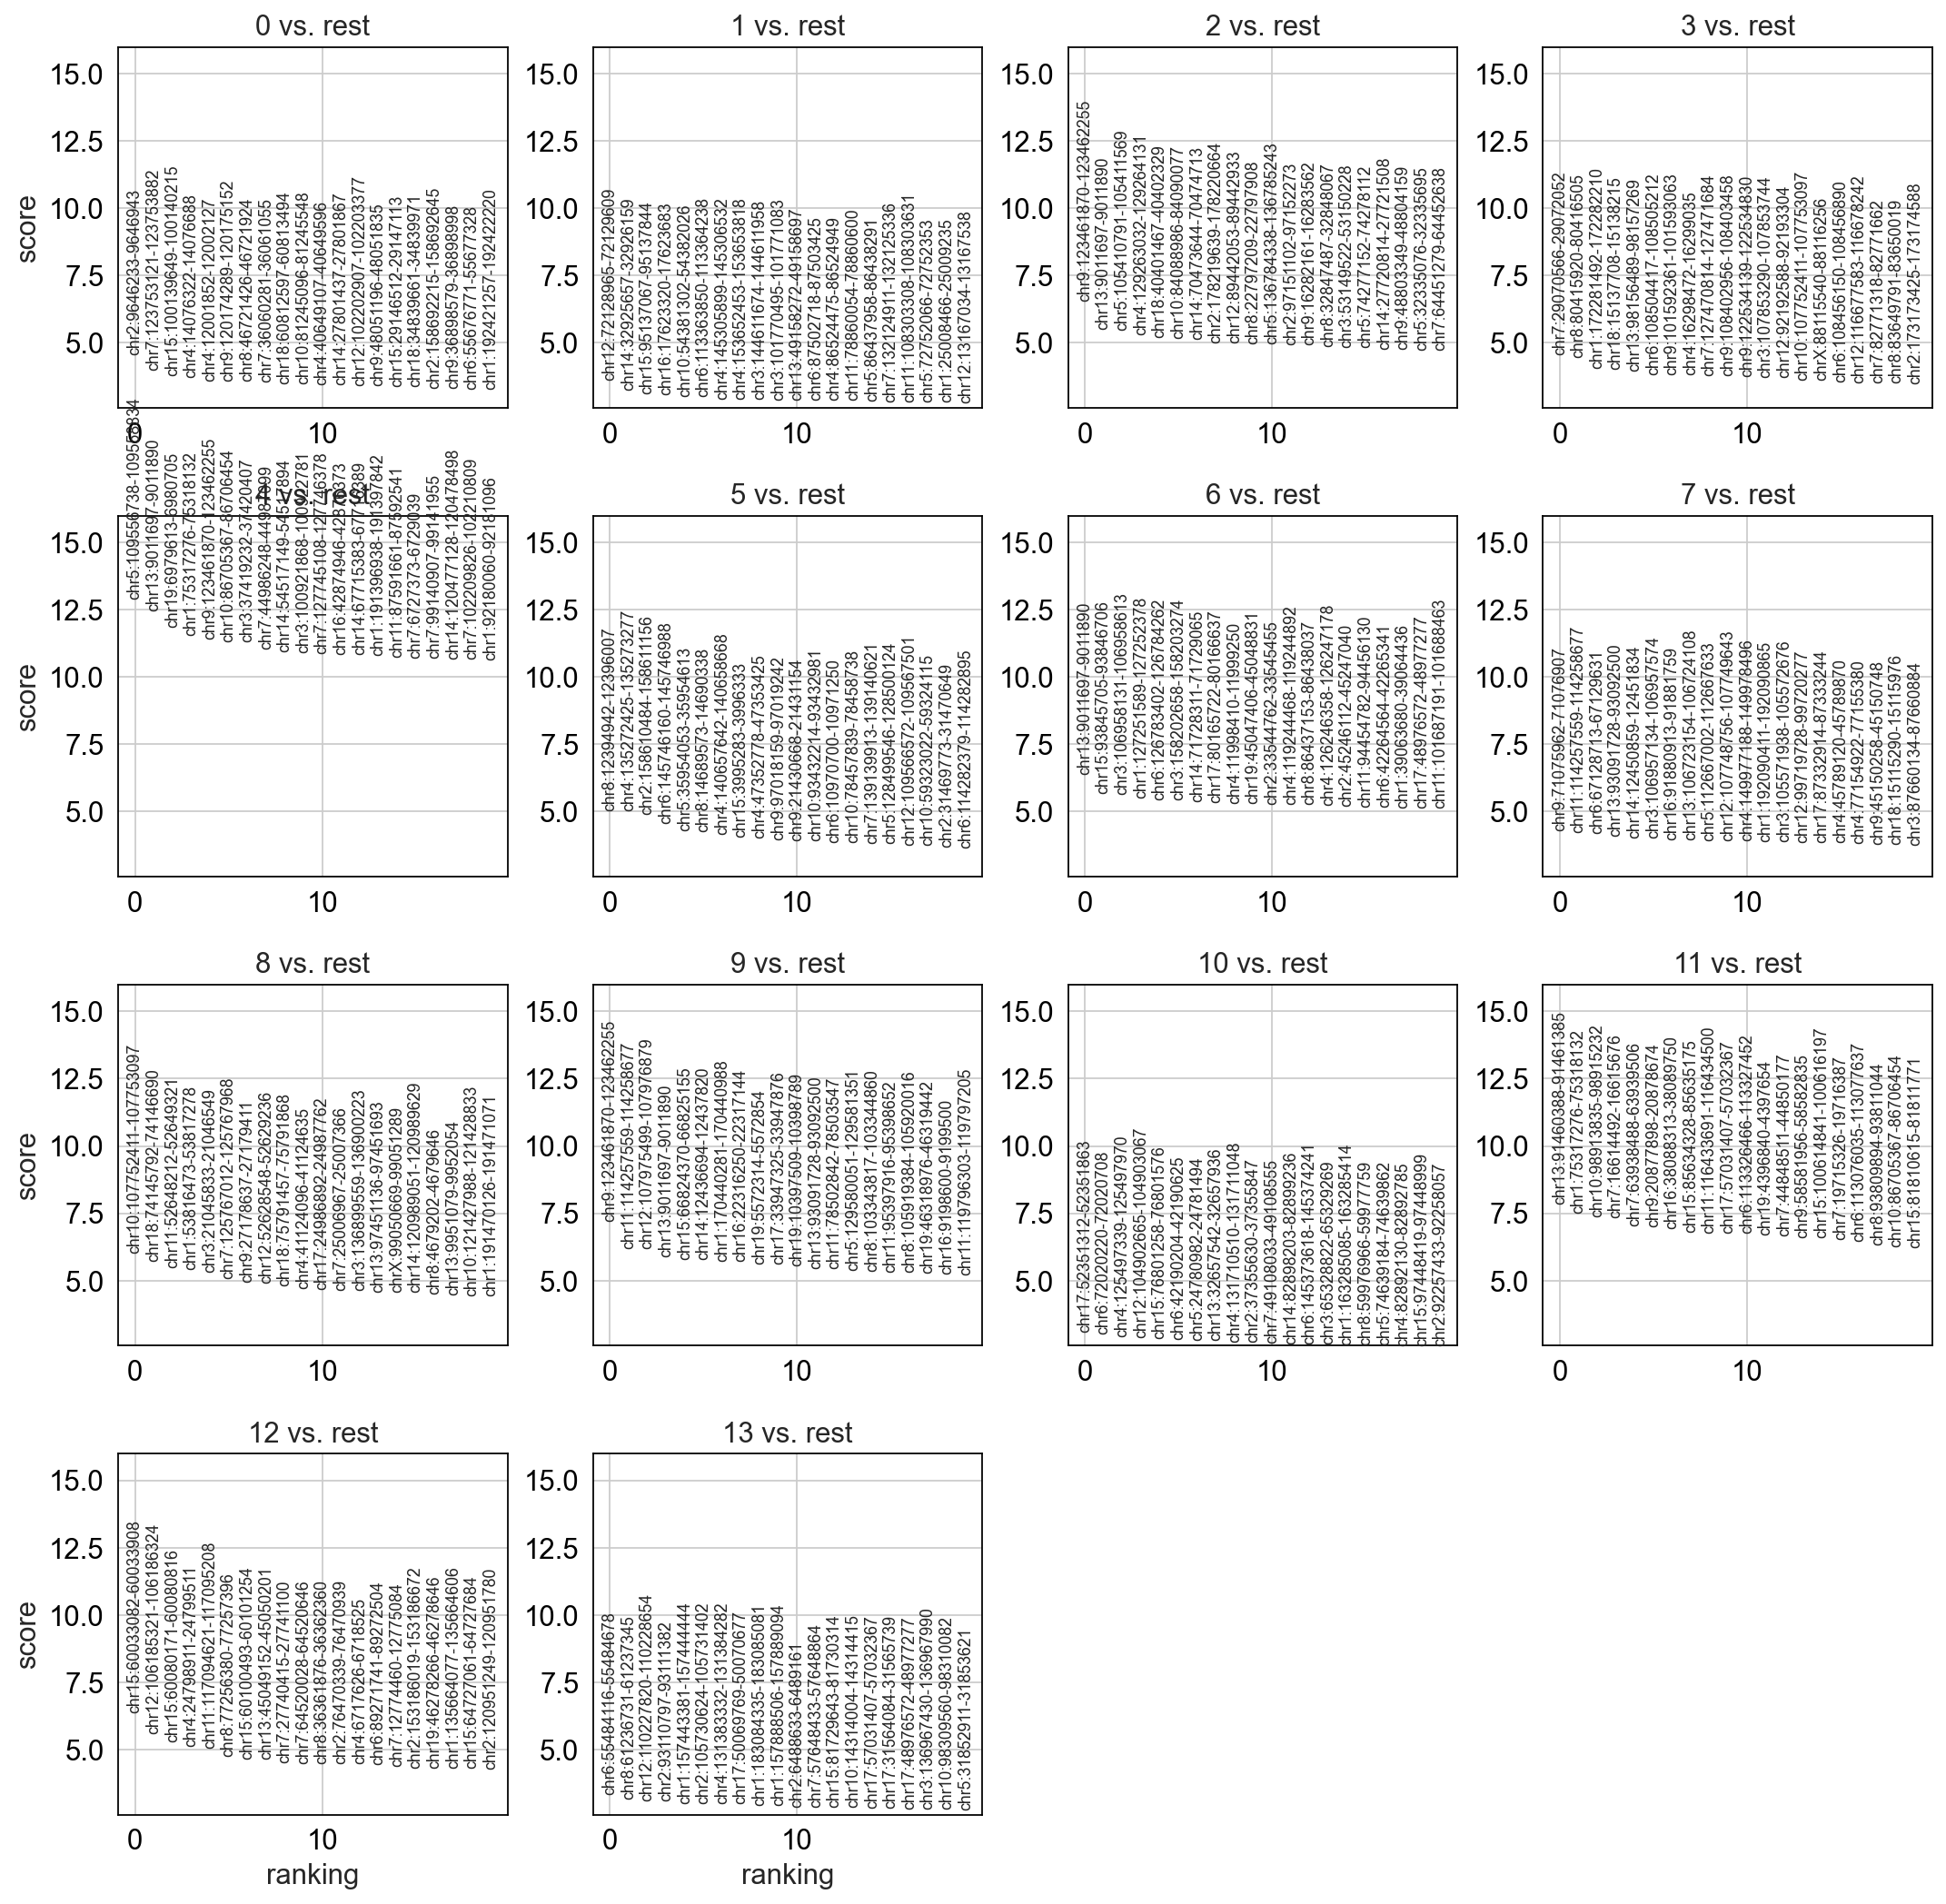

In [61]:
epi.pl.rank_feat_groups(adata)

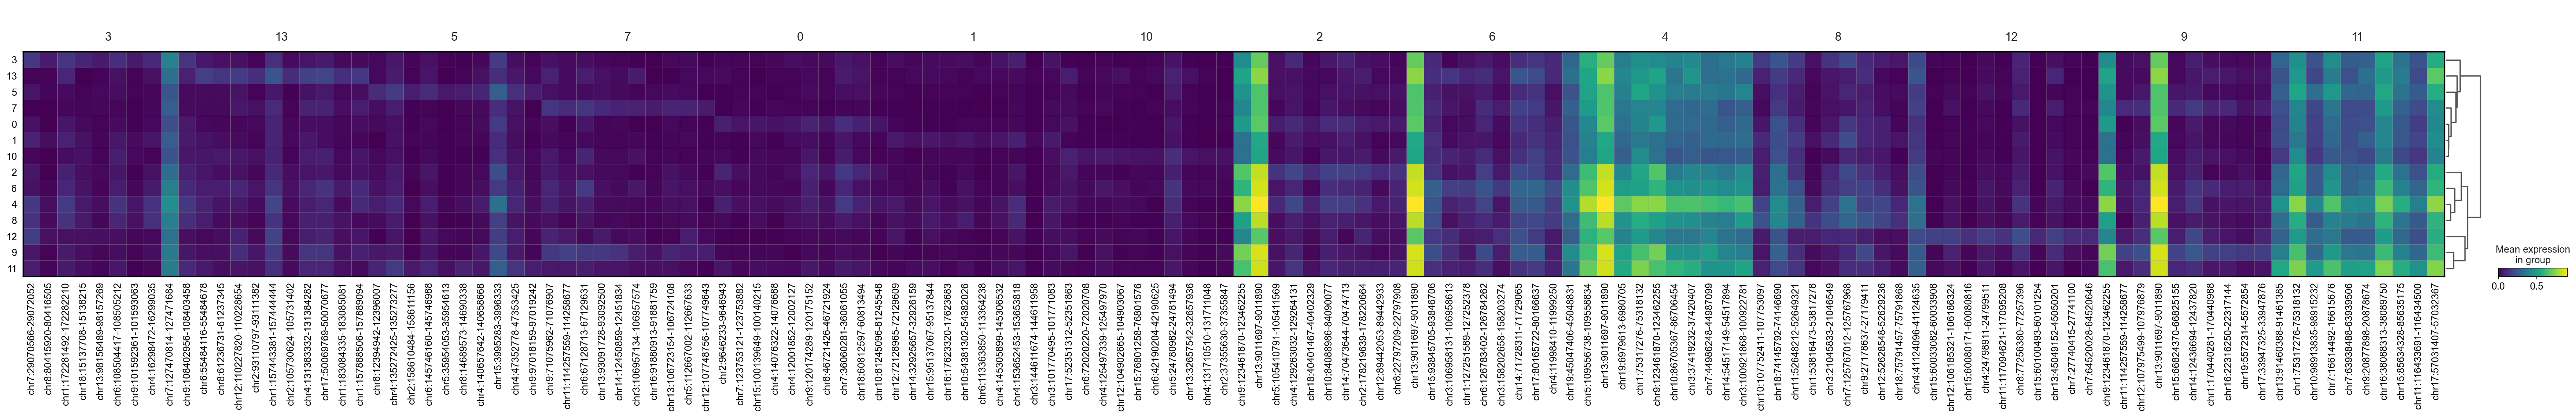

In [62]:
epi.pl.rank_feat_groups_matrixplot(adata)

In [63]:
adata


AnnData object with n_obs × n_vars = 5070 × 120960
    obs: 'nb_features', 'log_nb_features', 'louvain', 'kmeans', 'hc', 'leiden'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'omic', 'pca', 'neighbors', 'umap', 'louvain', 'louvain_colors', 'kmeans_colors', 'hc_colors', 'leiden', 'leiden_colors', 'rank_features_groups', 'dendrogram_louvain'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'tf-idf'
    obsp: 'distances', 'connectivities'